In [3]:
import pandas as pd
data=pd.read_excel('Scoring02.xlsx')
data

,Пол,Возраст,Семейное положение,Повторный клиент,Сумма выдачи номинал,Срок,Образование,Тип бизнеса,Длительность самой долгой единовременной просрочки в течение цикла,Год,Возраст_полные года
0,Муж,21.03.1997,Married,Старый клиент,5000,12,Высшее образование,4. Савдо / Торговля,0,1997,26
1,Муж,16.05.1986,Married,Старый клиент,4000,12,Высшее образование,3. Хизматрасони/Услуги,0,1986,37
2,Муж,08.12.1971,Married,Старый клиент,30000,12,Высшее образование,4. Савдо / Торговля,0,1971,52
3,Муж,02.04.1990,Married,Новый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,1990,33
4,Муж,10.06.1988,Married,Старый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,1988,35
...,...,...,...,...,...,...,...,...,...,...,...
2889,Муж,21.08.1996,Single,Старый клиент,10000,12,Сред.спец.образ-ние,1. Карзи истеъмоли/Потребительский кредит,358,1996,27
2890,Муж,11.07.1994,Married,Новый клиент,10000,12,Среднее образование,4. Савдо / Торговля,447,1994,29
2891,Муж,02.03.1998,Single,Новый клиент,10000,12,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,554,1998,25
2892,Муж,04.12.1998,Single,Старый клиент,10000,18,Высшее образование,1. Карзи истеъмоли/Потребительский кредит,414,1998,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 11 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Пол                                                                 2894 non-null   object
 1   Возраст                                                             2894 non-null   object
 2   Семейное положение                                                  2894 non-null   object
 3   Повторный клиент                                                    2894 non-null   object
 4   Сумма выдачи номинал                                                2894 non-null   int64 
 5   Срок                                                                2894 non-null   int64 
 6   Образование                                                         2894 non-null   object
 7   Тип бизнеса             

In [5]:
data=data.drop(['Возраст', 'Год'], axis=1)

In [6]:
Пол = {'Муж':0,'Жен':1}
data['Пол'] = data['Пол'].map(Пол)

In [7]:
data[('Семейное положение')].value_counts()

Married          1905
Single            689
Divorced          189
Widow/Widower     111
Name: Семейное положение, dtype: int64

In [8]:
data['Семейное положение'].unique()

array(['Married', 'Widow/Widower', 'Single', 'Divorced'], dtype=object)

In [9]:
data.loc[data["Семейное положение"]=="Married", "Family_status"]=2
data.loc[data["Семейное положение"]=="Single", "Family_status"]=1
data.loc[data["Семейное положение"]=="Widow/Widower", "Family_status"]=0
data.loc[data["Семейное положение"]=="Divorced", "Family_status"]=3


In [10]:
data.loc[data["Повторный клиент"]=="Старый клиент", "Type of client"]=0
data.loc[data["Повторный клиент"]=="Новый клиент", "Type of client"]=1


In [11]:
data['Повторный клиент'].unique()

array(['Старый клиент', 'Новый клиент'], dtype=object)

In [12]:
data=data.drop(['Повторный клиент'], axis=1)

In [13]:
data.loc[data["Образование"]=="Высшее образование", "Education"]=0
data.loc[data["Образование"]=="Сред.спец.образ-ние", "Education"]=1
data.loc[data["Образование"]=="Среднее образование", "Education"]=2
data.loc[data["Образование"]=="Непол Сред.образ", "Education"]=3
data.loc[data["Образование"]=="Начал образование", "Education"]=4
data.loc[data["Образование"]=="Аспирантура", "Education"]=5

In [14]:
data=data.drop(['Образование'], axis=1)

In [15]:
data.loc[data["Тип бизнеса"]=="1. Карзи истеъмоли/Потребительский кредит", "Tupe of business"]=0
data.loc[data["Тип бизнеса"]=="2. Истехсолот/Производство", "Tupe of business"]=1
data.loc[data["Тип бизнеса"]=="6. Хочагии кишлок / Сельское хозяйство", "Tupe of business"]=2
data.loc[data["Тип бизнеса"]=="3. Хизматрасони/Услуги", "Tupe of business"]=3
data.loc[data["Тип бизнеса"]=="4. Савдо / Торговля", "Tupe of business"]=4


In [16]:
data=data.drop(['Тип бизнеса'], axis=1)

In [17]:
data.loc[data['Длительность самой долгой единовременной просрочки в течение цикла'] > 20, 'default_flg'] = 1
data.loc[data['Длительность самой долгой единовременной просрочки в течение цикла'] <= 20, 'default_flg'] = 0

In [18]:
data=data.drop(['Длительность самой долгой единовременной просрочки в течение цикла'], axis=1)

In [19]:
data=data.drop(['Семейное положение'], axis=1)

<AxesSubplot:>

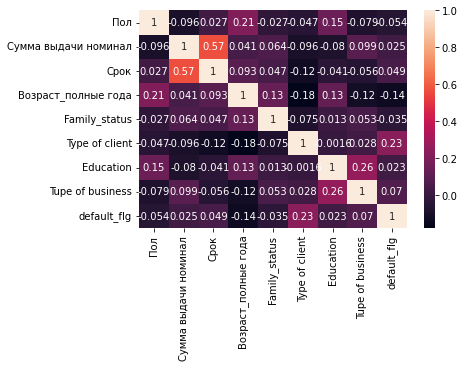

In [20]:
import seaborn as sns
from scipy.stats import norm 
sns.heatmap(data.corr(), annot=True)

In [21]:
data = data.rename(columns={'Сумма выдачи номинал': 'Сумма_выдачи_номинал'})
data = data.rename(columns={'Возраст_полные года': 'Возраст_полные_года'})
data = data.rename(columns={'Type of client': 'Type_of_client'})
data = data.rename(columns={'Tupe of business': 'Tupe_of_business'})

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
X = data.drop(['default_flg'] , axis=1)
y = data['default_flg']

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [26]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.8120950323974082
0.7979274611398963


In [27]:
rf = RandomForestClassifier(n_estimators=100 , min_samples_split = 10 , random_state=42 , min_samples_leaf = 4 , max_depth = 20)

In [28]:
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [29]:
y=data['default_flg']
X=data.drop(['default_flg'], axis=1)

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [31]:
y_pred = rf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8324697754749568


In [33]:
import matplotlib.pyplot as plt

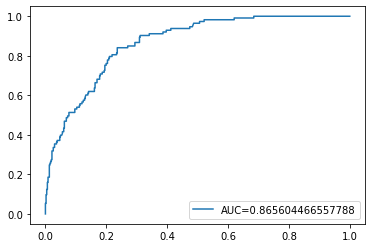

In [34]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [35]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [36]:
y_pred = svclassifier.predict(X_test)

In [37]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7271157167530224


In [38]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=1)
model_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=1)

In [39]:
y_predict = model_tree.predict(X_test)

In [40]:
print (accuracy_score(y_test,y_pred))

0.7271157167530224


In [45]:
from sklearn.neighbors import KNeighborsClassifier 

In [49]:
forest1 =  RandomForestClassifier(criterion='gini', n_estimators =250 , random_state = 200, n_jobs = 2)
forest1.fit(X_train, y_train)
y_predict = forest1.predict(X_test)  
forest1auc = metrics.roc_auc_score(y_test,y_predict)
print(forest1auc)

0.5662292529150367


In [52]:
import pickle
models = {
    "scoring_imon_ModelTree.pkl": model_tree,
    "scoring_imon_Forest.pkl": rf,
    "scoring_imon_Forest(par).pkl": forest1,
    "scoring_imon_KNN.pkl": knn,
    "scoring_imon_LogReg.pkl": logreg,
}

for filename, model in models.items():
    with open(filename, "wb") as pickle_out:
        pickle.dump(model, pickle_out)